<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/13aout(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

In [ ]:
Cl = '/content/cs-longiaN+.xlsx'
data= pd.read_excel(Cl,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [ ]:
del data["Source"]
del data["CodeSite"]

In [ ]:
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [ ]:
(data[data["Cs_longia"]==1]).count

<bound method DataFrame.count of         X_long      Y_lat  Cs_longia  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.911420  23.794740          1  ...       5.4       5.5       4.9
1   -13.188370  27.132950          1  ...       4.3       3.7       3.8
2   -13.188370  27.132950          1  ...       4.3       3.7       3.8
8   -13.207000  27.170000          1  ...       4.4       3.6       3.9
9   -13.214230  27.166700          1  ...       4.4       3.6       3.8
..         ...        ...        ...  ...       ...       ...       ...
249  -5.366667  35.766667          1  ...       4.0       4.0       4.2
250  -5.816667  35.783333          1  ...       3.6       3.8       4.0
251  -5.366667  35.833333          1  ...       4.0       3.9       4.3
252  -5.558611  35.841944          1  ...       3.6       3.4       3.6
253  -5.483333  35.900000          1  ...       4.0       4.0       4.2

[127 rows x 226 columns]>

In [ ]:
(data[data["Cs_longia"]==0]).count

<bound method DataFrame.count of        X_long     Y_lat  Cs_longia  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.18562  27.15794          0  ...       4.1       3.7       3.9
4   -13.16718  27.15773          0  ...       4.2       3.6       3.8
5   -13.20156  27.16507          0  ...       4.6       3.8       3.9
6   -13.20700  27.16500          0  ...       4.6       3.8       3.9
7   -13.20700  27.16600          0  ...       4.6       3.8       3.9
..        ...       ...        ...  ...       ...       ...       ...
155  -6.20400  30.68600          0  ...       3.1       3.5       3.3
157  -6.91000  30.91300          0  ...       2.7       2.9       2.8
158  -6.86400  30.86600          0  ...       3.4       3.4       3.6
159  -6.88600  30.93900          0  ...       2.8       2.9       2.6
160  -5.00000  31.52220          0  ...       3.4       2.8       3.0

[127 rows x 226 columns]>

In [ ]:
X1 = data.loc[:, data.columns != 'Cs_longia']
y1 = data.Cs_longia

In [ ]:
X1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [ ]:
y1

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

XGBClassifier


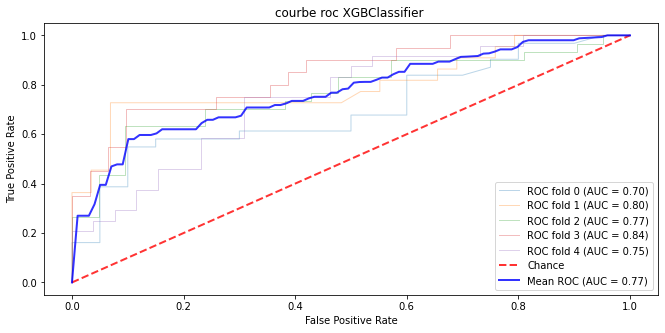

Accuracy: [0.60784314 0.64705882 0.68627451 0.70588235 0.7       ]
moy_accuracy: 0.67
precision: [0.7037037  0.57142857 0.71875    0.6        0.66666667]
moy_precision: 0.65
sensibilité : [0.61290323 0.72727273 0.76666667 0.75       0.75      ]
moy_sensibilité: 0.72
spécificité : [0.6        0.5862069  0.57142857 0.67741935 0.65384615]
moy_spécificité: 0.62
MCC : [0.20825267 0.3120159  0.34415774 0.41743932 0.40482045]
MCC: 0.34
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


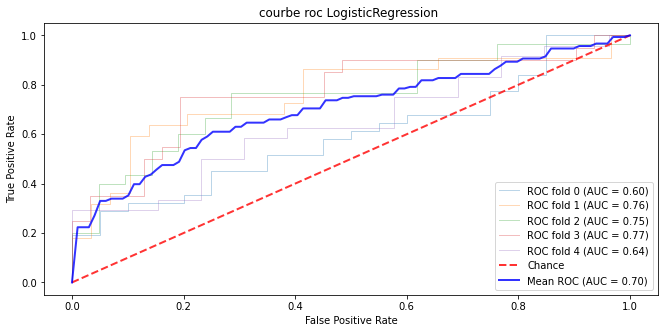

Accuracy: [0.54901961 0.68627451 0.7254902  0.76470588 0.64      ]
moy_accuracy: 0.67
precision: [0.66666667 0.59375    0.76666667 0.7        0.65      ]
moy_precision: 0.68
sensibilité : [0.51612903 0.86363636 0.76666667 0.7        0.54166667]
moy_sensibilité: 0.68
spécificité : [0.6        0.55172414 0.66666667 0.80645161 0.73076923]
moy_spécificité: 0.67
MCC : [0.11359237 0.4254845  0.43333333 0.50645161 0.27783119]
MCC: 0.35
RandomForestClassifier


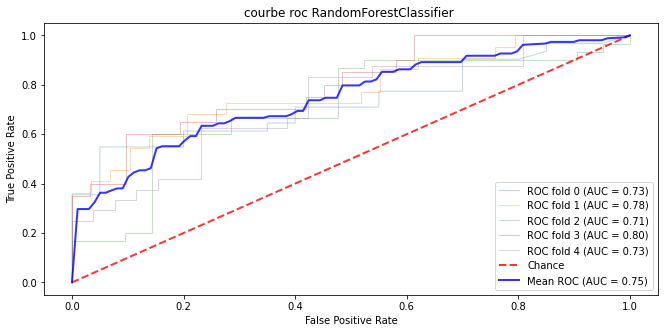

Accuracy: [0.68627451 0.62745098 0.68627451 0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.94117647 0.55172414 0.81818182 0.58333333 0.65217391]
moy_precision: 0.71
sensibilité : [0.51612903 0.72727273 0.6        0.7        0.625     ]
moy_sensibilité: 0.63
spécificité : [0.95       0.55172414 0.80952381 0.67741935 0.69230769]
moy_spécificité: 0.74
MCC : [0.48276756 0.27899687 0.40694816 0.36917519 0.31807321]
MCC: 0.37
GradientBoostingClassifier


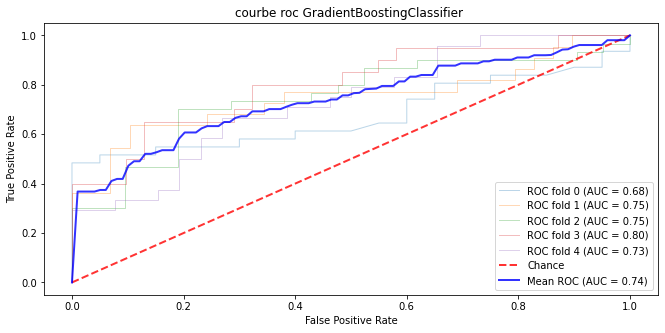

Accuracy: [0.62745098 0.66666667 0.7254902  0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.77272727 0.59259259 0.80769231 0.59090909 0.64      ]
moy_precision: 0.68
sensibilité : [0.5483871  0.72727273 0.7        0.65       0.66666667]
moy_sensibilité: 0.66
spécificité : [0.75       0.62068966 0.76190476 0.70967742 0.65384615]
moy_spécificité: 0.70
MCC : [0.29414776 0.34526705 0.45474301 0.3545673  0.32025631]
MCC: 0.35
GaussianNB


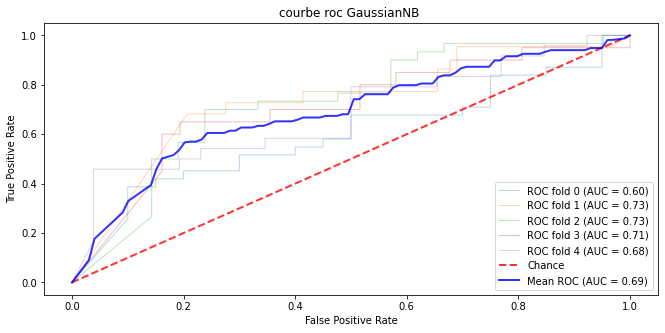

Accuracy: [0.56862745 0.58823529 0.66666667 0.64705882 0.62      ]
moy_accuracy: 0.62
precision: [0.65517241 0.51219512 0.6969697  0.53846154 0.60869565]
moy_precision: 0.60
sensibilité : [0.61290323 0.95454545 0.76666667 0.7        0.58333333]
moy_sensibilité: 0.72
spécificité : [0.5        0.31034483 0.52380952 0.61290323 0.65384615]
moy_spécificité: 0.52
MCC : [0.11129915 0.33043378 0.29914903 0.30559708 0.23775169]
MCC: 0.26
KNeighborsClassifier


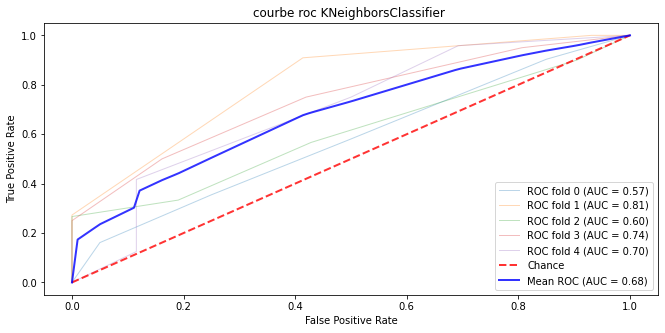

Accuracy: [0.50980392 0.70588235 0.52941176 0.70588235 0.66      ]
moy_accuracy: 0.62
precision: [0.6875     0.68421053 0.71428571 0.66666667 0.76923077]
moy_precision: 0.70
sensibilité : [0.35483871 0.59090909 0.33333333 0.5        0.41666667]
moy_sensibilité: 0.44
spécificité : [0.75       0.79310345 0.80952381 0.83870968 0.88461538]
moy_spécificité: 0.82
MCC : [0.11031219 0.39337246 0.15754599 0.36293309 0.34315712]
MCC: 0.27


In [ ]:
classifiers = {
    "XGBClassifier":  XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=3,n_estimators=100),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

XGBClassifier


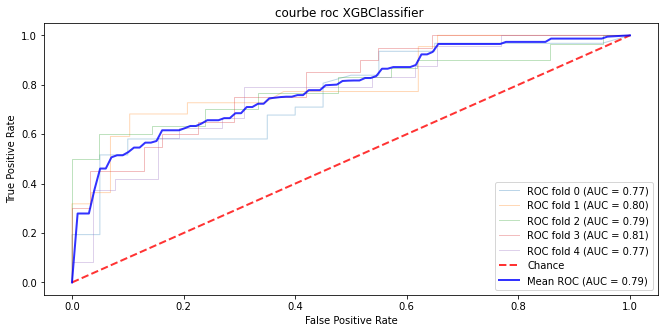

Accuracy: [0.62745098 0.64705882 0.7254902  0.7254902  0.74      ]
moy_accuracy: 0.69
precision: [0.75       0.56666667 0.76666667 0.625      0.7037037 ]
moy_precision: 0.68
sensibilité : [0.58064516 0.77272727 0.76666667 0.75       0.79166667]
moy_sensibilité: 0.73
spécificité : [0.7        0.55172414 0.66666667 0.70967742 0.69230769]
moy_spécificité: 0.66
MCC : [0.27451489 0.32650492 0.43333333 0.44963645 0.48514197]
MCC: 0.39
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


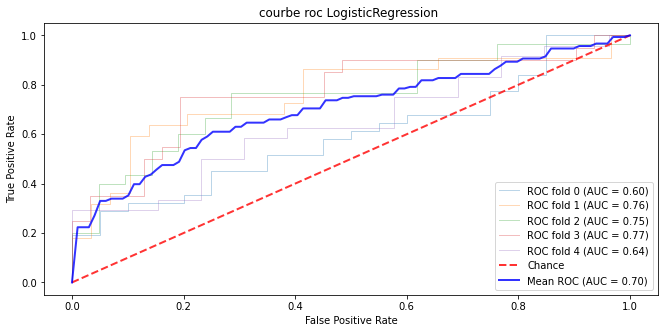

Accuracy: [0.54901961 0.68627451 0.7254902  0.76470588 0.64      ]
moy_accuracy: 0.67
precision: [0.66666667 0.59375    0.76666667 0.7        0.65      ]
moy_precision: 0.68
sensibilité : [0.51612903 0.86363636 0.76666667 0.7        0.54166667]
moy_sensibilité: 0.68
spécificité : [0.6        0.55172414 0.66666667 0.80645161 0.73076923]
moy_spécificité: 0.67
MCC : [0.11359237 0.4254845  0.43333333 0.50645161 0.27783119]
MCC: 0.35
RandomForestClassifier


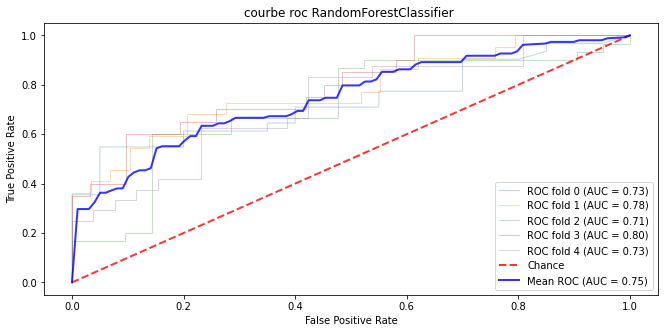

Accuracy: [0.68627451 0.62745098 0.68627451 0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.94117647 0.55172414 0.81818182 0.58333333 0.65217391]
moy_precision: 0.71
sensibilité : [0.51612903 0.72727273 0.6        0.7        0.625     ]
moy_sensibilité: 0.63
spécificité : [0.95       0.55172414 0.80952381 0.67741935 0.69230769]
moy_spécificité: 0.74
MCC : [0.48276756 0.27899687 0.40694816 0.36917519 0.31807321]
MCC: 0.37
GradientBoostingClassifier


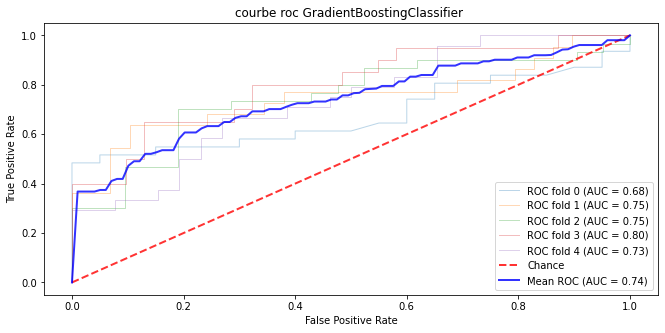

Accuracy: [0.62745098 0.66666667 0.7254902  0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.77272727 0.59259259 0.80769231 0.59090909 0.64      ]
moy_precision: 0.68
sensibilité : [0.5483871  0.72727273 0.7        0.65       0.66666667]
moy_sensibilité: 0.66
spécificité : [0.75       0.62068966 0.76190476 0.70967742 0.65384615]
moy_spécificité: 0.70
MCC : [0.29414776 0.34526705 0.45474301 0.3545673  0.32025631]
MCC: 0.35
GaussianNB


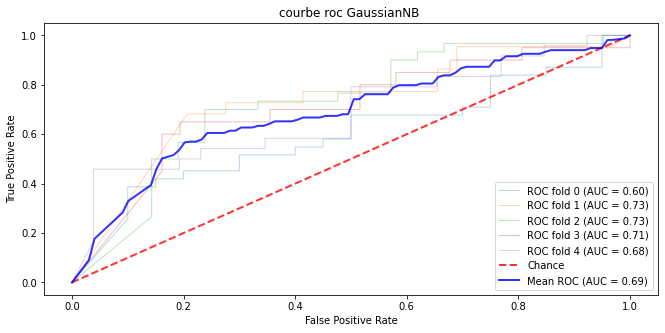

Accuracy: [0.56862745 0.58823529 0.66666667 0.64705882 0.62      ]
moy_accuracy: 0.62
precision: [0.65517241 0.51219512 0.6969697  0.53846154 0.60869565]
moy_precision: 0.60
sensibilité : [0.61290323 0.95454545 0.76666667 0.7        0.58333333]
moy_sensibilité: 0.72
spécificité : [0.5        0.31034483 0.52380952 0.61290323 0.65384615]
moy_spécificité: 0.52
MCC : [0.11129915 0.33043378 0.29914903 0.30559708 0.23775169]
MCC: 0.26
KNeighborsClassifier


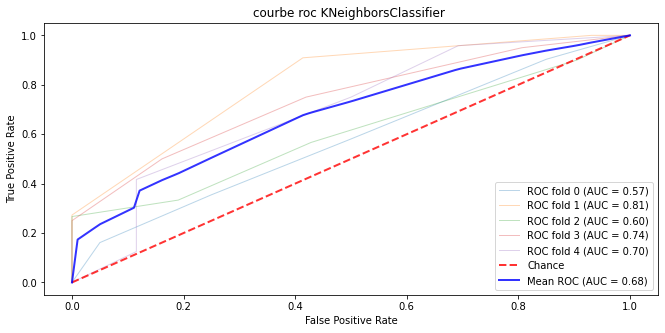

Accuracy: [0.50980392 0.70588235 0.52941176 0.70588235 0.66      ]
moy_accuracy: 0.62
precision: [0.6875     0.68421053 0.71428571 0.66666667 0.76923077]
moy_precision: 0.70
sensibilité : [0.35483871 0.59090909 0.33333333 0.5        0.41666667]
moy_sensibilité: 0.44
spécificité : [0.75       0.79310345 0.80952381 0.83870968 0.88461538]
moy_spécificité: 0.82
MCC : [0.11031219 0.39337246 0.15754599 0.36293309 0.34315712]
MCC: 0.27


In [ ]:
classifiers = {
    "XGBClassifier":  XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

XGBClassifier


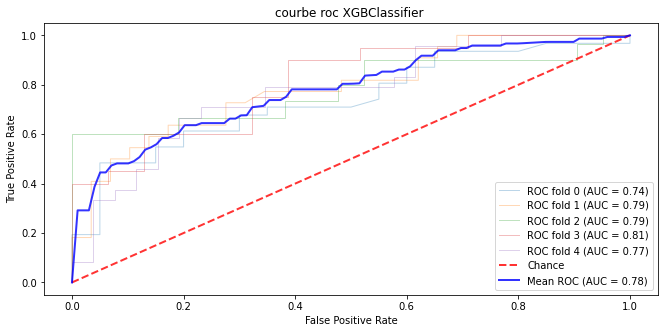

Accuracy: [0.66666667 0.62745098 0.66666667 0.70588235 0.7       ]
moy_accuracy: 0.67
precision: [0.79166667 0.5483871  0.72413793 0.6        0.66666667]
moy_precision: 0.67
sensibilité : [0.61290323 0.77272727 0.7        0.75       0.75      ]
moy_sensibilité: 0.72
spécificité : [0.75       0.51724138 0.61904762 0.67741935 0.65384615]
moy_spécificité: 0.64
MCC : [0.35497615 0.29414776 0.31704101 0.41743932 0.40482045]
MCC: 0.36
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


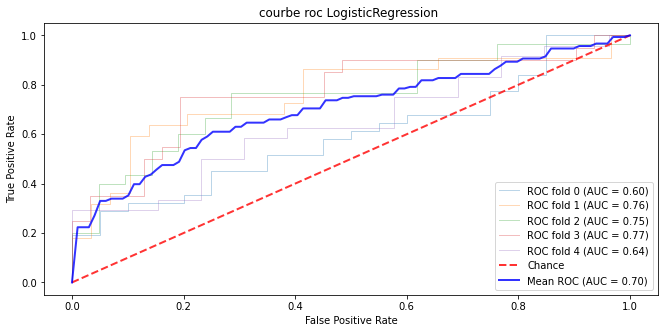

Accuracy: [0.54901961 0.68627451 0.7254902  0.76470588 0.64      ]
moy_accuracy: 0.67
precision: [0.66666667 0.59375    0.76666667 0.7        0.65      ]
moy_precision: 0.68
sensibilité : [0.51612903 0.86363636 0.76666667 0.7        0.54166667]
moy_sensibilité: 0.68
spécificité : [0.6        0.55172414 0.66666667 0.80645161 0.73076923]
moy_spécificité: 0.67
MCC : [0.11359237 0.4254845  0.43333333 0.50645161 0.27783119]
MCC: 0.35
RandomForestClassifier


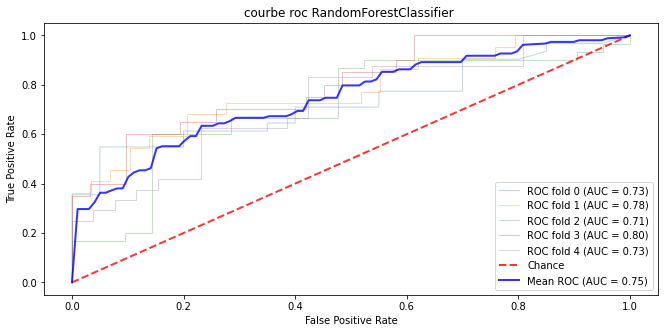

Accuracy: [0.68627451 0.62745098 0.68627451 0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.94117647 0.55172414 0.81818182 0.58333333 0.65217391]
moy_precision: 0.71
sensibilité : [0.51612903 0.72727273 0.6        0.7        0.625     ]
moy_sensibilité: 0.63
spécificité : [0.95       0.55172414 0.80952381 0.67741935 0.69230769]
moy_spécificité: 0.74
MCC : [0.48276756 0.27899687 0.40694816 0.36917519 0.31807321]
MCC: 0.37
GradientBoostingClassifier


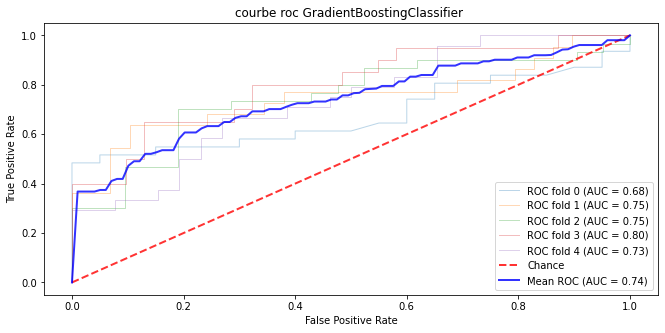

Accuracy: [0.62745098 0.66666667 0.7254902  0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.77272727 0.59259259 0.80769231 0.59090909 0.64      ]
moy_precision: 0.68
sensibilité : [0.5483871  0.72727273 0.7        0.65       0.66666667]
moy_sensibilité: 0.66
spécificité : [0.75       0.62068966 0.76190476 0.70967742 0.65384615]
moy_spécificité: 0.70
MCC : [0.29414776 0.34526705 0.45474301 0.3545673  0.32025631]
MCC: 0.35
GaussianNB


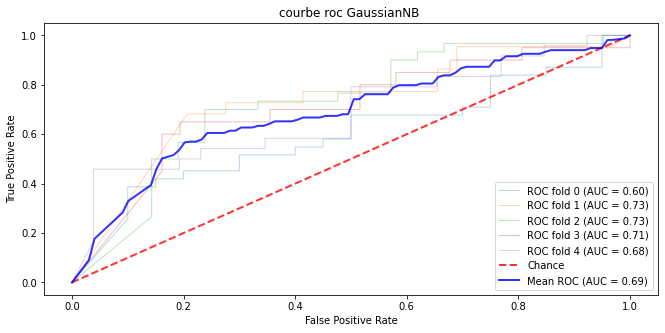

Accuracy: [0.56862745 0.58823529 0.66666667 0.64705882 0.62      ]
moy_accuracy: 0.62
precision: [0.65517241 0.51219512 0.6969697  0.53846154 0.60869565]
moy_precision: 0.60
sensibilité : [0.61290323 0.95454545 0.76666667 0.7        0.58333333]
moy_sensibilité: 0.72
spécificité : [0.5        0.31034483 0.52380952 0.61290323 0.65384615]
moy_spécificité: 0.52
MCC : [0.11129915 0.33043378 0.29914903 0.30559708 0.23775169]
MCC: 0.26
KNeighborsClassifier


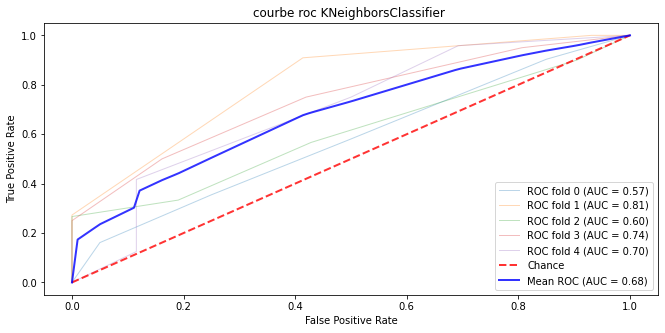

Accuracy: [0.50980392 0.70588235 0.52941176 0.70588235 0.66      ]
moy_accuracy: 0.62
precision: [0.6875     0.68421053 0.71428571 0.66666667 0.76923077]
moy_precision: 0.70
sensibilité : [0.35483871 0.59090909 0.33333333 0.5        0.41666667]
moy_sensibilité: 0.44
spécificité : [0.75       0.79310345 0.80952381 0.83870968 0.88461538]
moy_spécificité: 0.82
MCC : [0.11031219 0.39337246 0.15754599 0.36293309 0.34315712]
MCC: 0.27


In [ ]:
classifiers = {
    "XGBClassifier":  XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=8,n_estimators=100),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

XGBClassifier


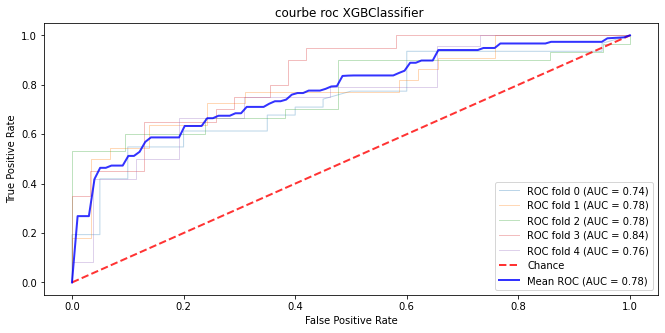

Accuracy: [0.66666667 0.66666667 0.64705882 0.7254902  0.66      ]
moy_accuracy: 0.67
precision: [0.79166667 0.5862069  0.7        0.63636364 0.62068966]
moy_precision: 0.67
sensibilité : [0.61290323 0.77272727 0.7        0.7        0.75      ]
moy_sensibilité: 0.71
spécificité : [0.75       0.5862069  0.57142857 0.74193548 0.57692308]
moy_spécificité: 0.65
MCC : [0.35497615 0.35893417 0.27142857 0.43565668 0.33092473]
MCC: 0.35
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


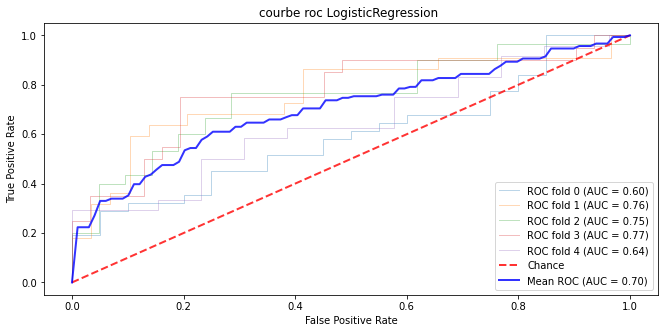

Accuracy: [0.54901961 0.68627451 0.7254902  0.76470588 0.64      ]
moy_accuracy: 0.67
precision: [0.66666667 0.59375    0.76666667 0.7        0.65      ]
moy_precision: 0.68
sensibilité : [0.51612903 0.86363636 0.76666667 0.7        0.54166667]
moy_sensibilité: 0.68
spécificité : [0.6        0.55172414 0.66666667 0.80645161 0.73076923]
moy_spécificité: 0.67
MCC : [0.11359237 0.4254845  0.43333333 0.50645161 0.27783119]
MCC: 0.35
RandomForestClassifier


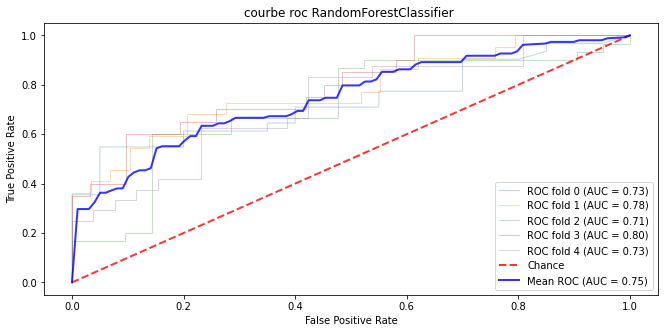

Accuracy: [0.68627451 0.62745098 0.68627451 0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.94117647 0.55172414 0.81818182 0.58333333 0.65217391]
moy_precision: 0.71
sensibilité : [0.51612903 0.72727273 0.6        0.7        0.625     ]
moy_sensibilité: 0.63
spécificité : [0.95       0.55172414 0.80952381 0.67741935 0.69230769]
moy_spécificité: 0.74
MCC : [0.48276756 0.27899687 0.40694816 0.36917519 0.31807321]
MCC: 0.37
GradientBoostingClassifier


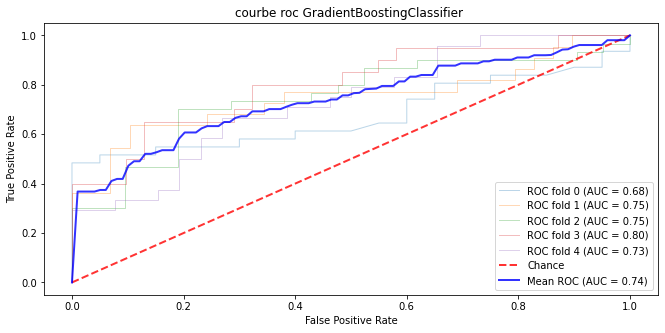

Accuracy: [0.62745098 0.66666667 0.7254902  0.68627451 0.66      ]
moy_accuracy: 0.67
precision: [0.77272727 0.59259259 0.80769231 0.59090909 0.64      ]
moy_precision: 0.68
sensibilité : [0.5483871  0.72727273 0.7        0.65       0.66666667]
moy_sensibilité: 0.66
spécificité : [0.75       0.62068966 0.76190476 0.70967742 0.65384615]
moy_spécificité: 0.70
MCC : [0.29414776 0.34526705 0.45474301 0.3545673  0.32025631]
MCC: 0.35
GaussianNB


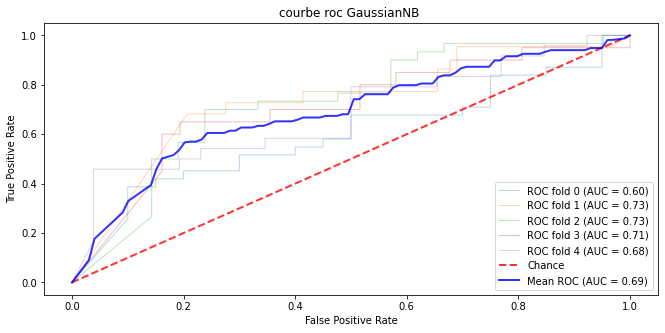

Accuracy: [0.56862745 0.58823529 0.66666667 0.64705882 0.62      ]
moy_accuracy: 0.62
precision: [0.65517241 0.51219512 0.6969697  0.53846154 0.60869565]
moy_precision: 0.60
sensibilité : [0.61290323 0.95454545 0.76666667 0.7        0.58333333]
moy_sensibilité: 0.72
spécificité : [0.5        0.31034483 0.52380952 0.61290323 0.65384615]
moy_spécificité: 0.52
MCC : [0.11129915 0.33043378 0.29914903 0.30559708 0.23775169]
MCC: 0.26
KNeighborsClassifier


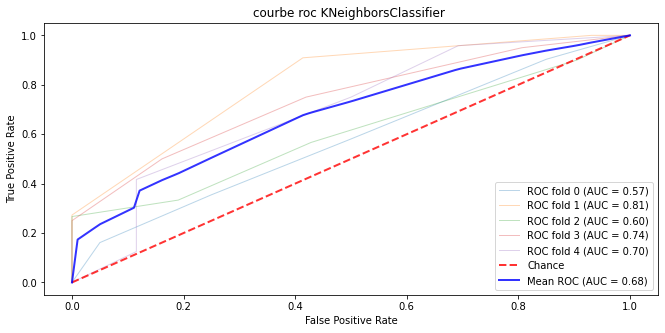

Accuracy: [0.50980392 0.70588235 0.52941176 0.70588235 0.66      ]
moy_accuracy: 0.62
precision: [0.6875     0.68421053 0.71428571 0.66666667 0.76923077]
moy_precision: 0.70
sensibilité : [0.35483871 0.59090909 0.33333333 0.5        0.41666667]
moy_sensibilité: 0.44
spécificité : [0.75       0.79310345 0.80952381 0.83870968 0.88461538]
moy_spécificité: 0.82
MCC : [0.11031219 0.39337246 0.15754599 0.36293309 0.34315712]
MCC: 0.27


In [ ]:
classifiers = {
    "XGBClassifier":  XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=12,n_estimators=100),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
import xgboost as xgb

XGBClassifier


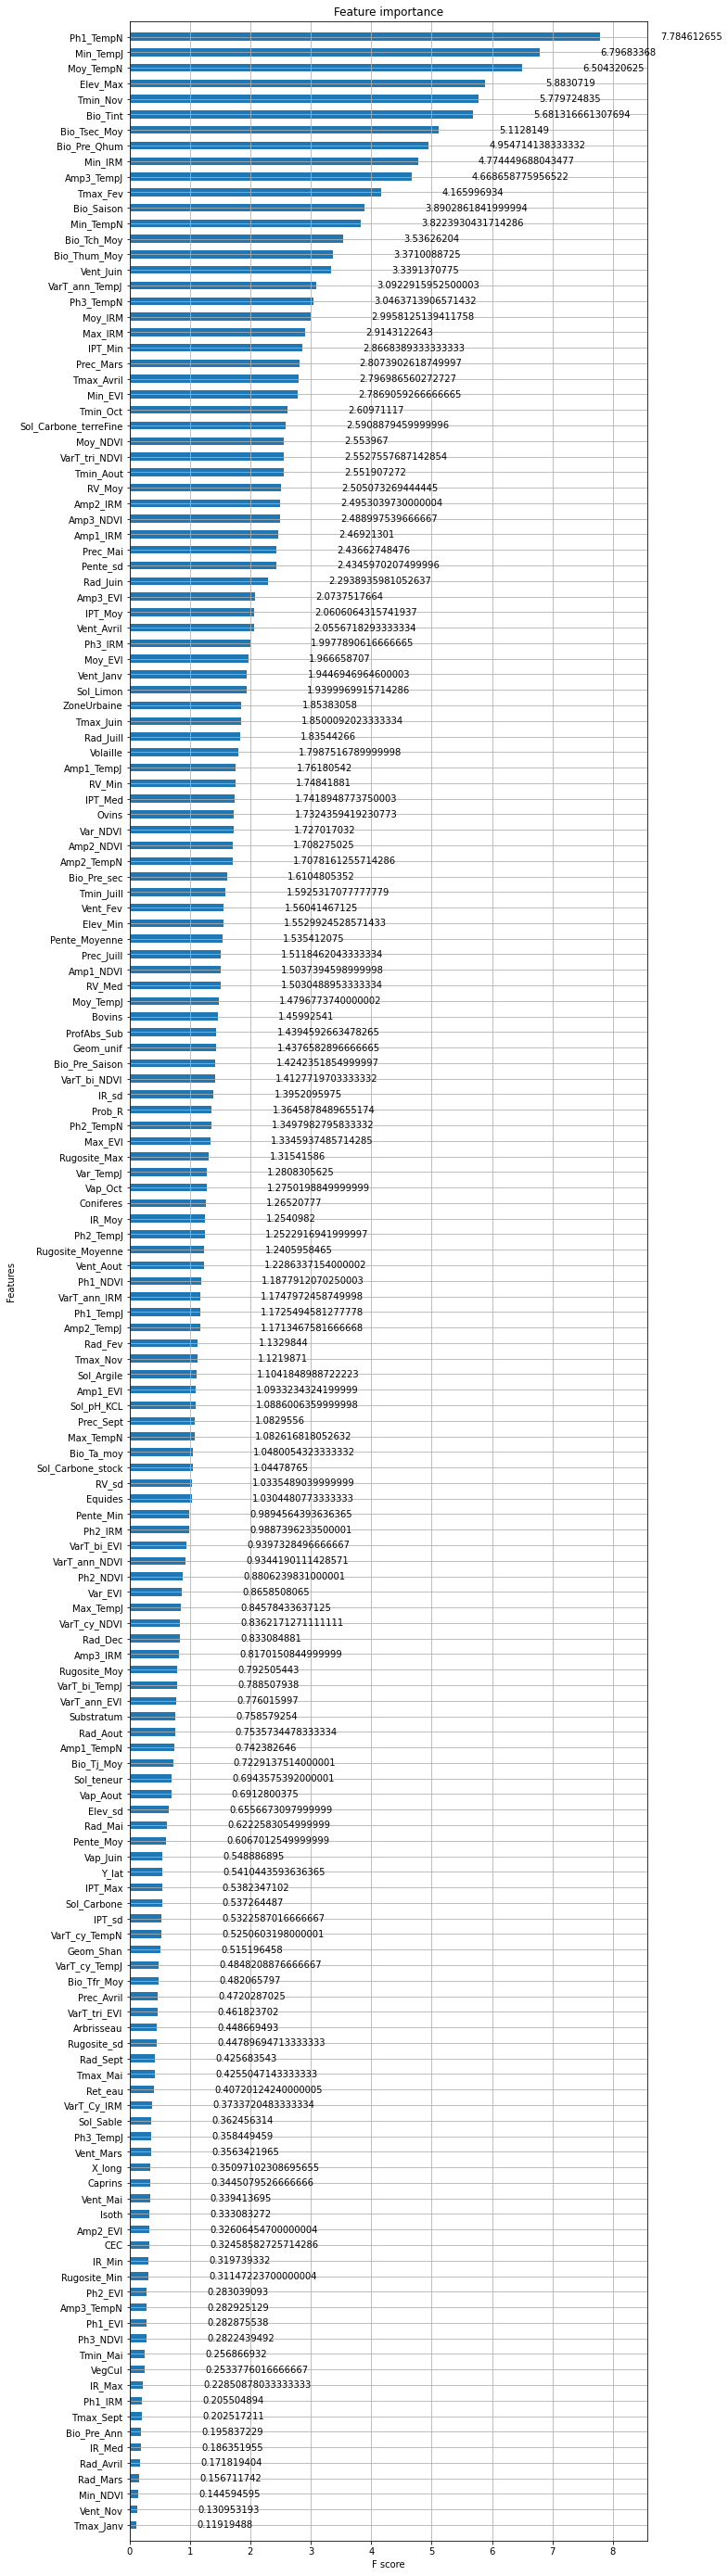

{'Amp3_TempJ': 4.668658775956522, 'Min_TempJ': 6.79683368, 'Amp1_EVI': 1.0933234324199999, 'Rad_Juin': 2.2938935981052637, 'VarT_ann_TempJ': 3.0922915952500003, 'Tmax_Juin': 1.8500092023333334, 'Bio_Saison': 3.8902861841999994, 'Moy_IRM': 2.9958125139411758, 'IPT_Moy': 2.0606064315741937, 'Ph1_TempN': 7.784612655, 'Sol_Limon': 1.9399969915714286, 'Amp3_EVI': 2.0737517664, 'Amp2_IRM': 2.4953039730000004, 'Moy_EVI': 1.966658707, 'Sol_Argile': 1.1041848988722223, 'Ph3_TempN': 3.0463713906571432, 'Vent_Fev': 1.56041467125, 'Ovins': 1.7324359419230773, 'ProfAbs_Sub': 1.4394592663478265, 'Y_lat': 0.5410443593636365, 'Amp1_IRM': 2.46921301, 'Ph3_IRM': 1.9977890616666665, 'Bio_Thum_Moy': 3.3710088725, 'Amp3_NDVI': 2.488997539666667, 'Ph2_TempN': 1.3497982795833332, 'Min_IRM': 4.774449688043477, 'Tmax_Fev': 4.165996934, 'Prec_Mars': 2.8073902618749997, 'Max_EVI': 1.3345937485714285, 'VarT_ann_NDVI': 0.9344190111428571, 'Tmin_Juill': 1.5925317077777779, 'Ph2_NDVI': 0.8806239831000001, 'Bio_Tint'

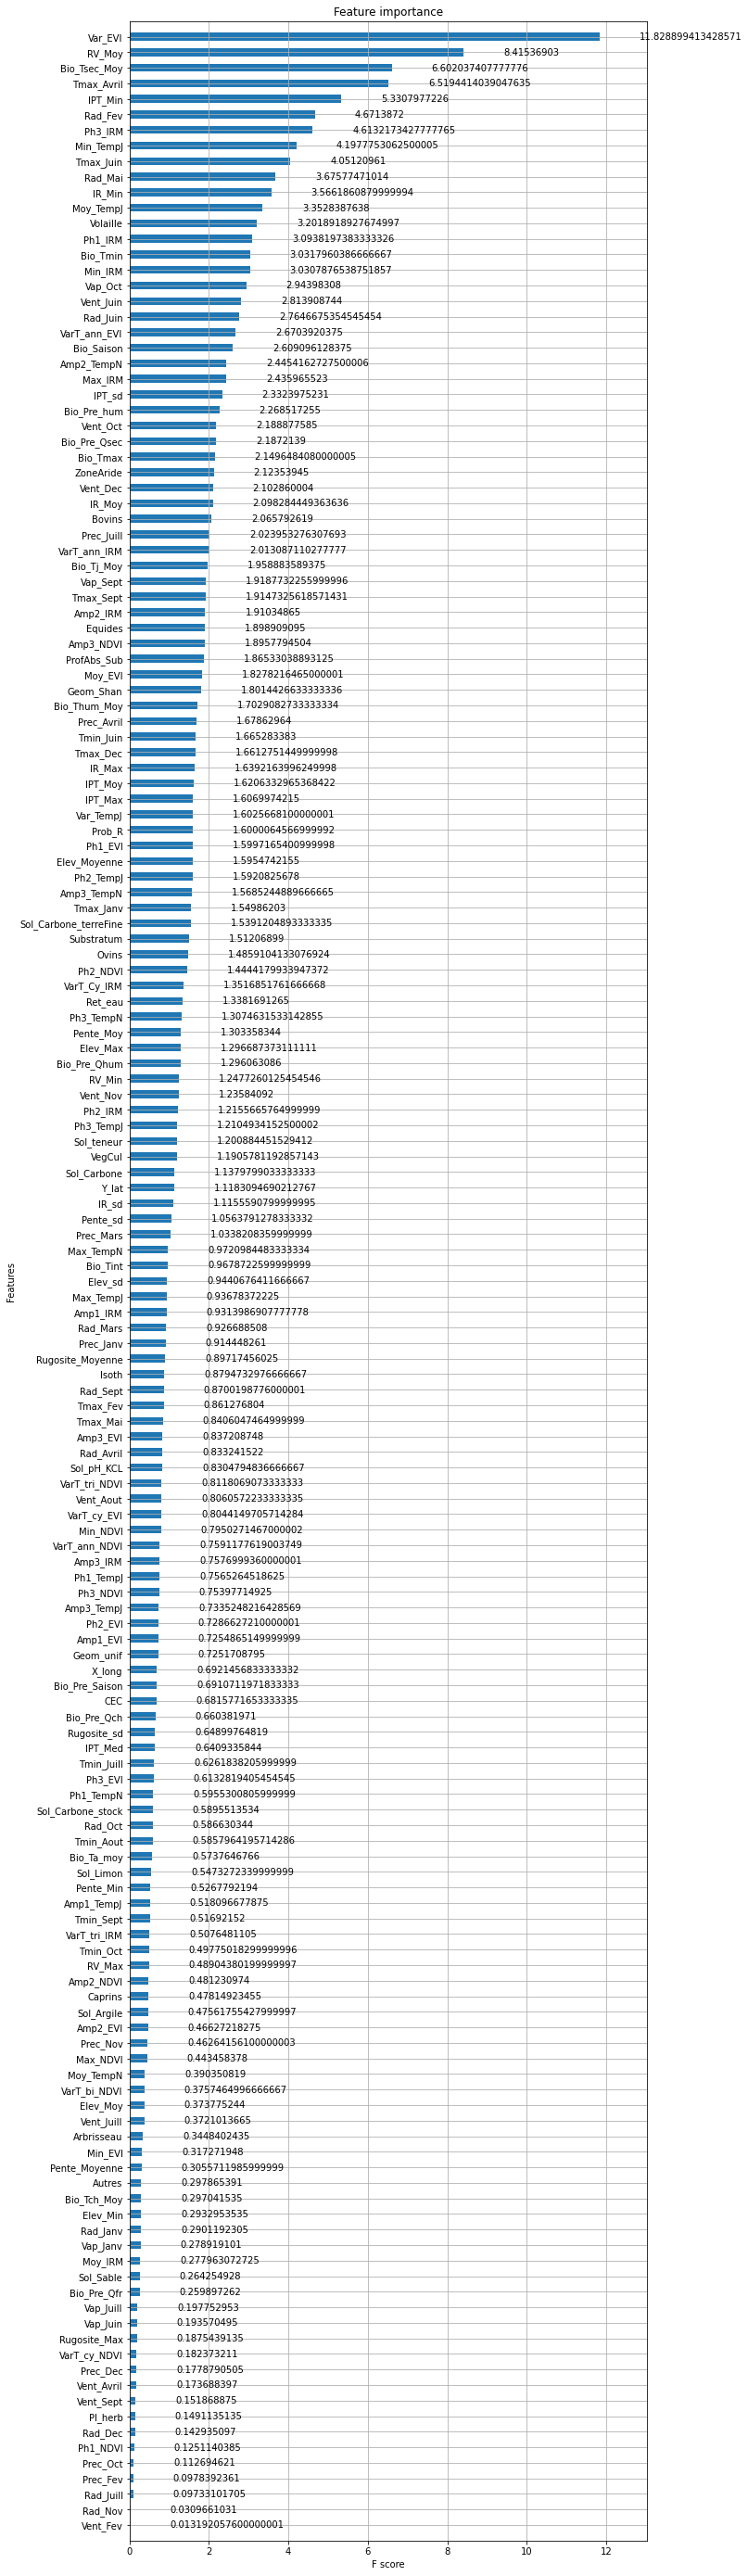

{'Var_EVI': 11.828899413428571, 'Rad_Mai': 3.67577471014, 'Ph1_EVI': 1.5997165400999998, 'Y_lat': 1.1183094690212767, 'VarT_Cy_IRM': 1.3516851761666668, 'Tmax_Avril': 6.5194414039047635, 'Ph3_IRM': 4.6132173427777765, 'Amp2_TempN': 2.4454162727500006, 'IPT_Min': 5.3307977226, 'Bio_Tsec_Moy': 6.602037407777776, 'X_long': 0.6921456833333332, 'IR_Min': 3.5661860879999994, 'IPT_sd': 2.3323975231, 'Rad_Juin': 2.7646675354545454, 'Amp3_TempN': 1.5685244889666665, 'Bovins': 2.065792619, 'Ph3_TempJ': 1.2104934152500002, 'Volaille': 3.2018918927674997, 'Elev_Moyenne': 1.5954742155, 'VarT_ann_IRM': 2.013087110277777, 'Ph2_NDVI': 1.4444179933947372, 'Rugosite_sd': 0.64899764819, 'Bio_Tj_Moy': 1.958883589375, 'Min_TempJ': 4.1977753062500005, 'Pente_Moy': 1.303358344, 'Min_IRM': 3.0307876538751857, 'Prec_Juill': 2.023953276307693, 'Moy_TempJ': 3.3528387638, 'Tmax_Juin': 4.05120961, 'Ph1_IRM': 3.0938197383333326, 'Sol_Carbone_terreFine': 1.5391204893333335, 'Amp3_NDVI': 1.8957794504, 'ProfAbs_Sub': 

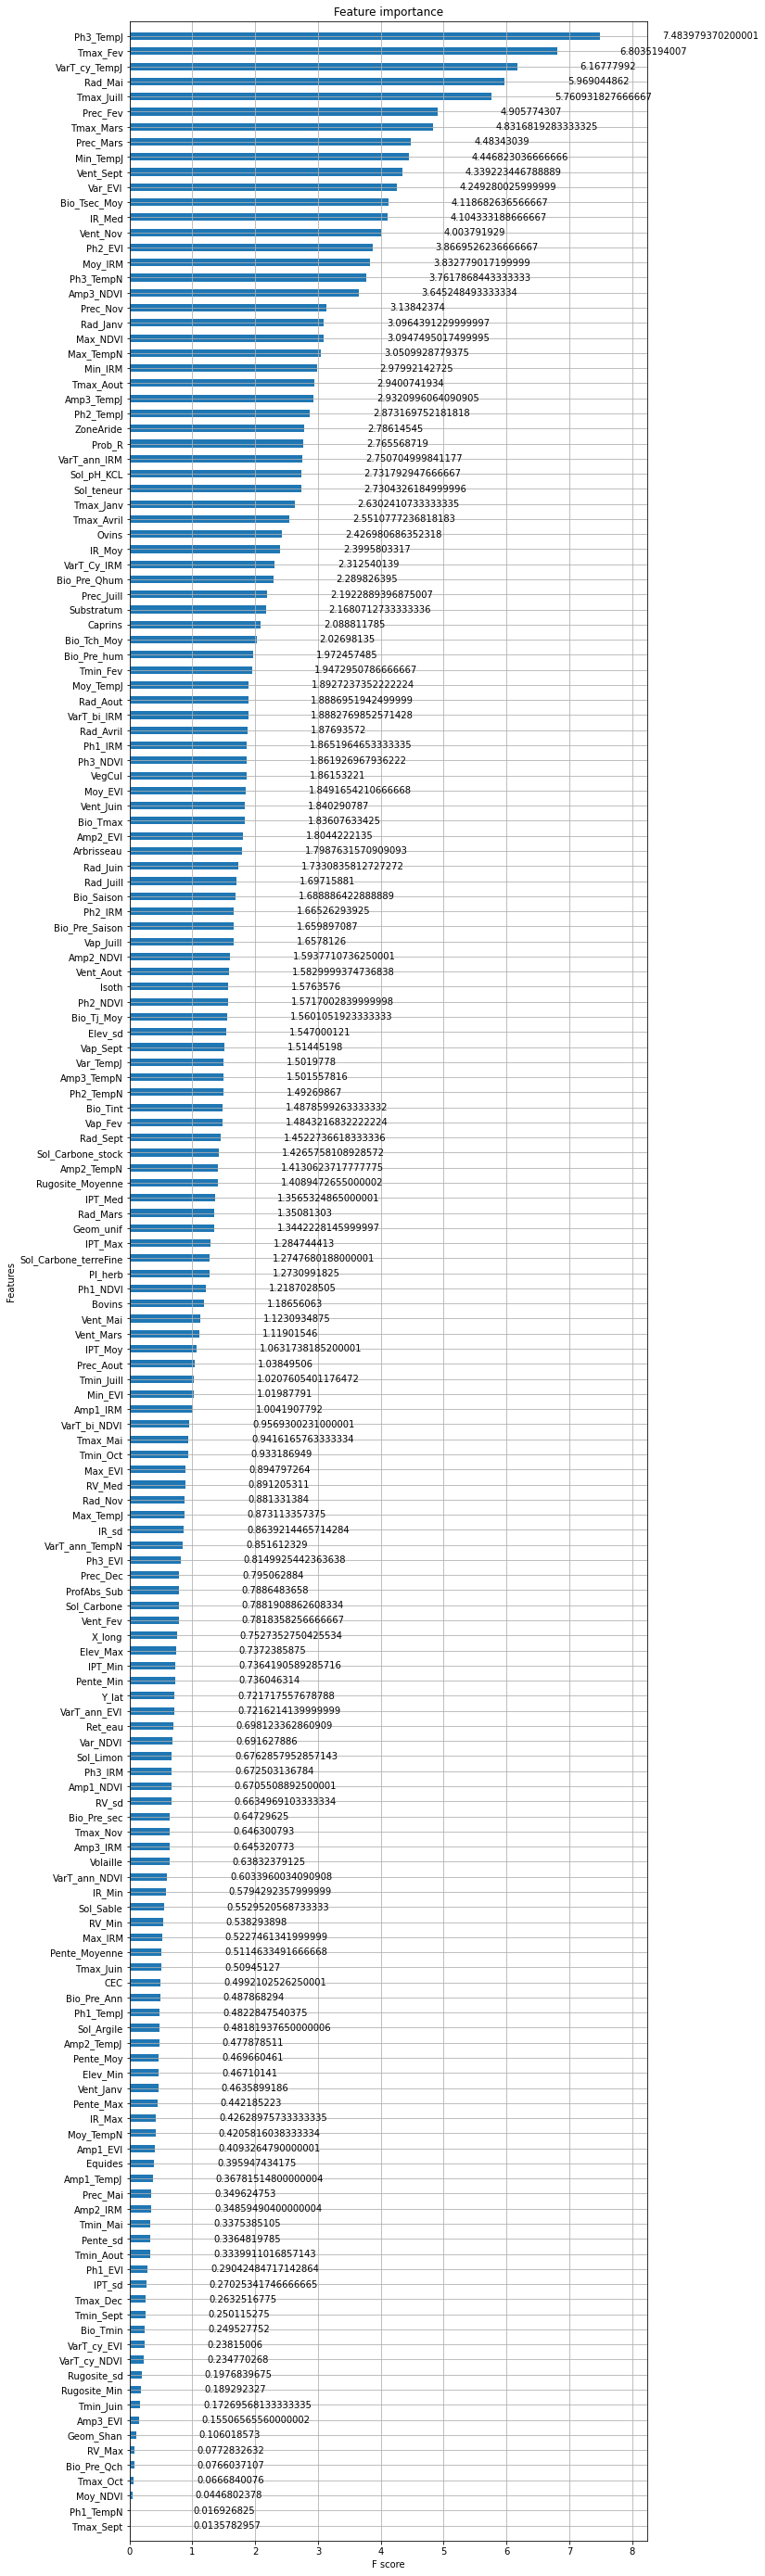

{'Amp3_TempJ': 2.9320996064090905, 'Min_TempJ': 4.446823036666666, 'X_long': 0.7527352750425534, 'Prob_R': 2.765568719, 'Ph1_IRM': 1.8651964653333335, 'Var_EVI': 4.249280025999999, 'Ph3_NDVI': 1.861926967936222, 'Rad_Mai': 5.969044862, 'VarT_bi_NDVI': 0.9569300231000001, 'Tmax_Fev': 6.8035194007, 'Ph2_EVI': 3.8669526236666667, 'Prec_Mars': 4.48343039, 'IR_Med': 4.104333188666667, 'Y_lat': 0.721717557678788, 'Bio_Pre_Saison': 1.659897087, 'Moy_IRM': 3.832779017199999, 'Max_TempN': 3.0509928779375, 'Equides': 0.395947434175, 'Prec_Nov': 3.13842374, 'Ph3_IRM': 0.672503136784, 'Amp3_NDVI': 3.645248493333334, 'Arbrisseau': 1.7987631570909093, 'Sol_teneur': 2.7304326184999996, 'VarT_ann_IRM': 2.750704999841177, 'Sol_Carbone_stock': 1.4265758108928572, 'Vent_Sept': 4.339223446788889, 'Tmax_Mars': 4.8316819283333325, 'Rad_Sept': 1.4522736618333336, 'Sol_pH_KCL': 2.731792947666667, 'Ph3_EVI': 0.8149925442363638, 'Ph3_TempN': 3.7617868443333333, 'Geom_unif': 1.3442228145999997, 'Ph3_TempJ': 7.48

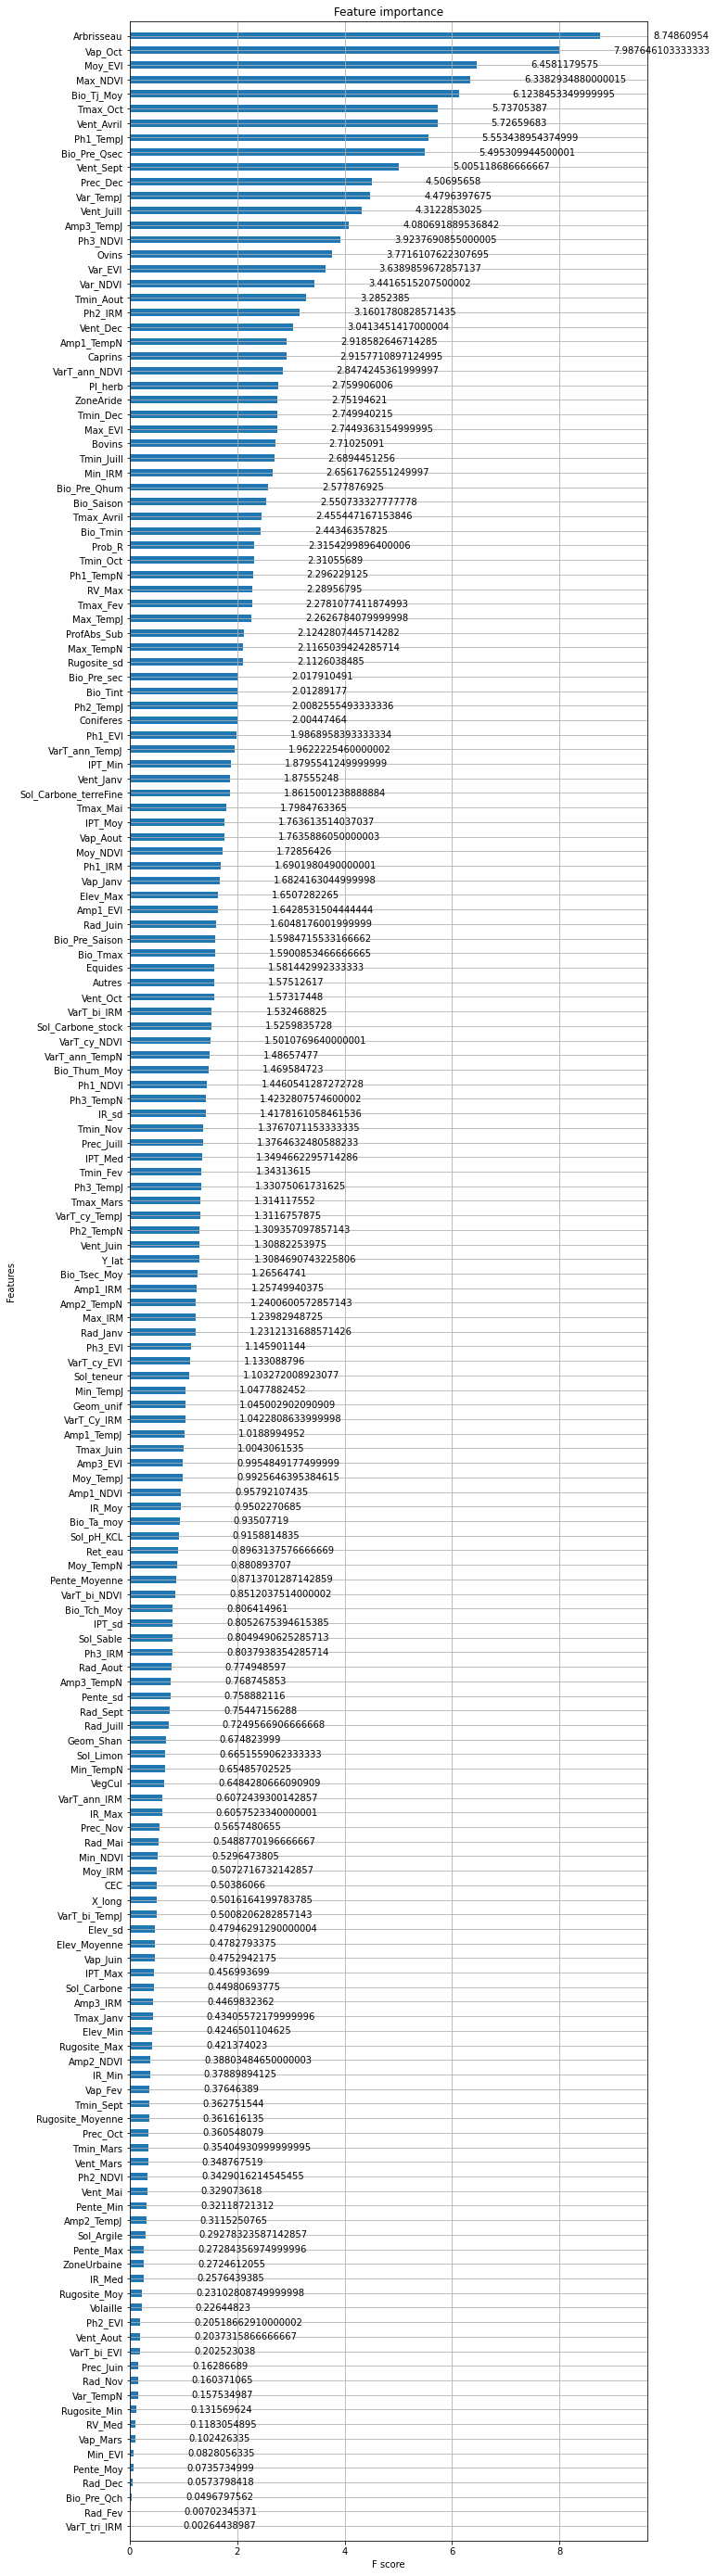

{'Amp3_TempJ': 4.080691889536842, 'Ovins': 3.7716107622307695, 'Ph1_TempJ': 5.553438954374999, 'Vent_Sept': 5.005118686666667, 'Bio_Saison': 2.550733327777778, 'Ph1_IRM': 1.6901980490000001, 'Max_NDVI': 6.3382934880000015, 'ProfAbs_Sub': 2.1242807445714282, 'Vent_Juill': 4.3122853025, 'Bio_Pre_Qsec': 5.495309944500001, 'Ph3_NDVI': 3.9237690855000005, 'Sol_teneur': 1.103272008923077, 'Ph3_TempJ': 1.33075061731625, 'Tmax_Fev': 2.2781077411874993, 'Equides': 1.581442992333333, 'Vent_Dec': 3.0413451417000004, 'Amp1_TempN': 2.918582646714285, 'Max_TempN': 2.1165039424285714, 'Ret_eau': 0.8963137576666669, 'Var_EVI': 3.6389859672857137, 'VarT_ann_NDVI': 2.8474245361999997, 'VarT_cy_TempJ': 1.3116757875, 'IPT_Moy': 1.763613514037037, 'Vap_Oct': 7.987646103333333, 'Ph2_IRM': 3.1601780828571435, 'Moy_EVI': 6.4581179575, 'Amp1_EVI': 1.6428531504444444, 'Pl_herb': 2.759906006, 'Ph1_EVI': 1.9868958393333334, 'Var_TempJ': 4.4796397675, 'Prob_R': 2.3154299896400006, 'Bio_Tj_Moy': 6.1238453349999995,

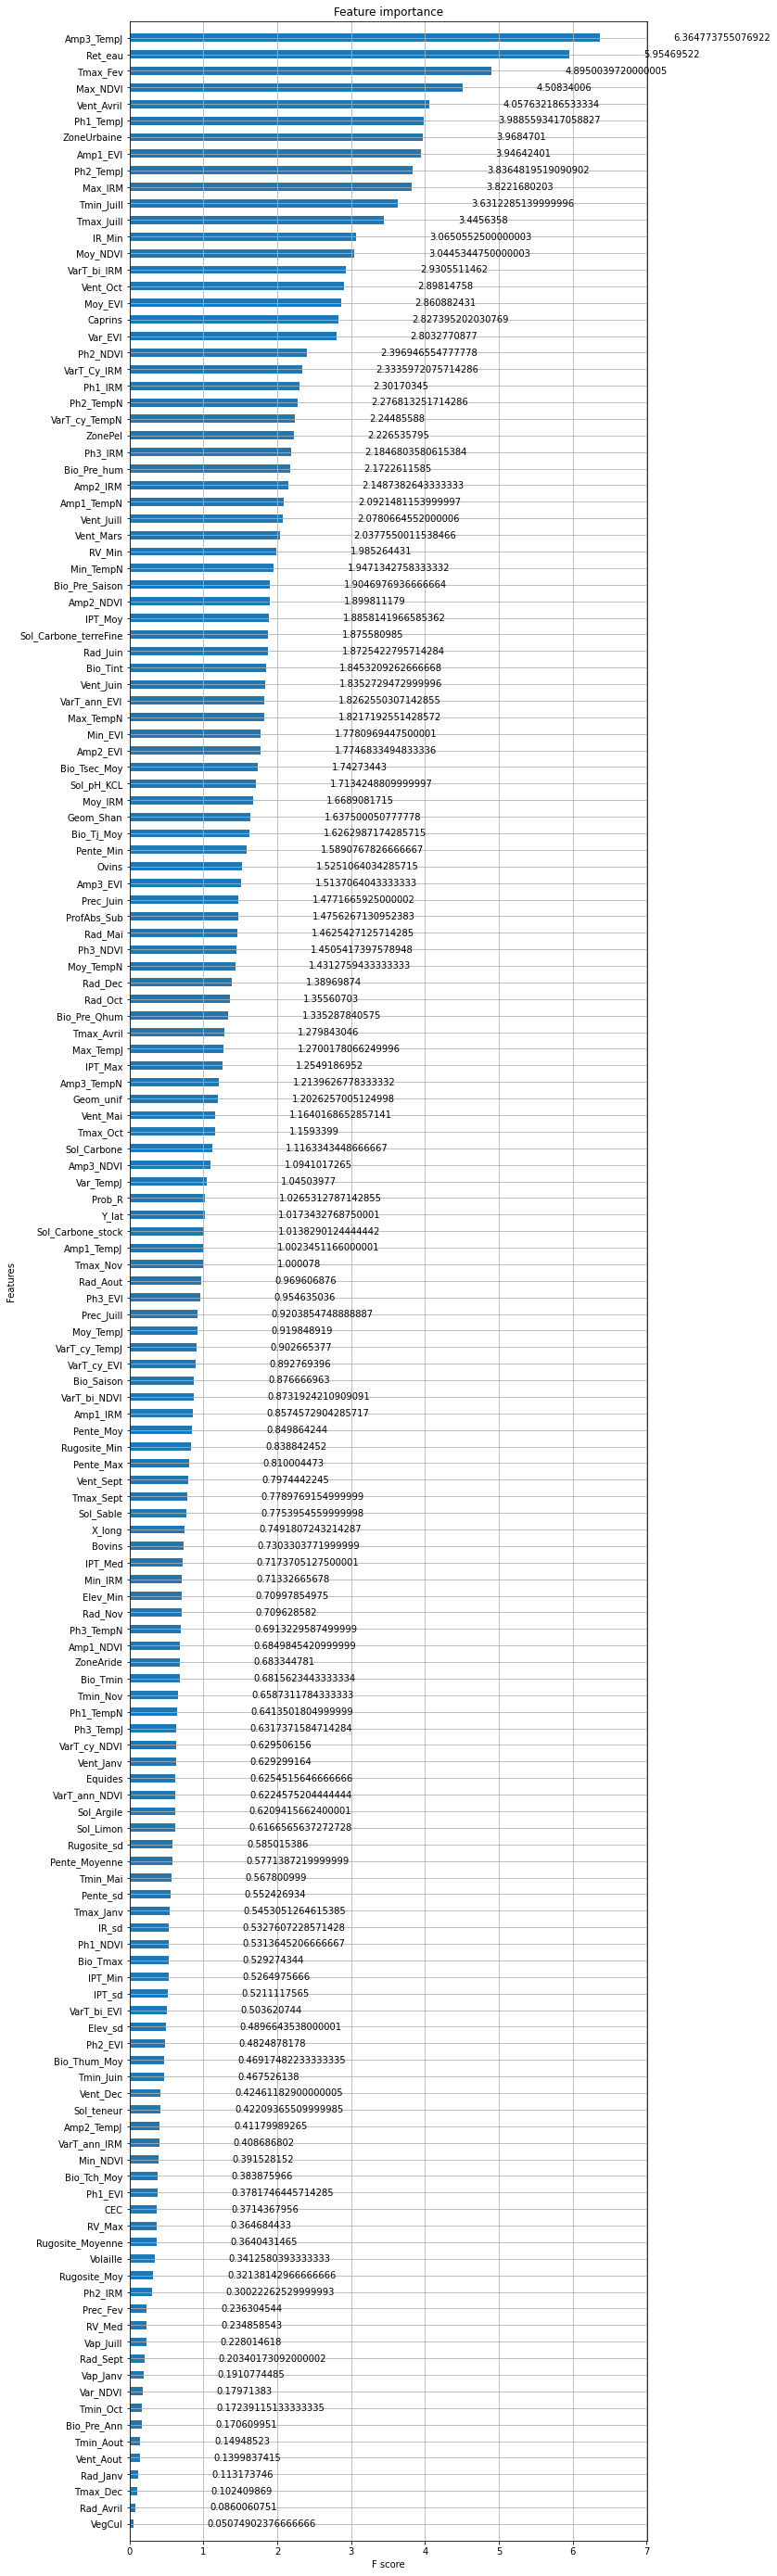

{'Amp3_TempJ': 6.364773755076922, 'Vent_Avril': 4.057632186533334, 'Caprins': 2.827395202030769, 'Ph1_TempJ': 3.9885593417058827, 'Geom_unif': 1.2026257005124998, 'X_long': 0.7491807243214287, 'Max_IRM': 3.8221680203, 'Tmax_Fev': 4.8950039720000005, 'Ph2_NDVI': 2.396946554777778, 'Ph3_EVI': 0.954635036, 'Ph2_TempJ': 3.8364819519090902, 'Ph3_NDVI': 1.4505417397578948, 'Bovins': 0.7303303771999999, 'Vent_Juin': 1.8352729472999996, 'Ret_eau': 5.95469522, 'Rad_Mai': 1.4625427125714285, 'Amp1_IRM': 0.8574572904285717, 'Max_NDVI': 4.50834006, 'Max_TempN': 1.8217192551428572, 'Amp1_TempJ': 1.0023451166000001, 'Bio_Pre_hum': 2.1722611585, 'Moy_NDVI': 3.0445344750000003, 'Sol_Argile': 0.6209415662400001, 'Amp2_IRM': 2.1487382643333333, 'Sol_pH_KCL': 1.7134248809999997, 'Moy_TempN': 1.4312759433333333, 'Bio_Pre_Saison': 1.9046976936666664, 'Ph2_TempN': 2.276813251714286, 'ProfAbs_Sub': 1.4756267130952383, 'ZonePel': 2.226535795, 'Prob_R': 1.0265312787142855, 'Var_EVI': 2.8032770877, 'VarT_ann_IR

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         model=clf.fit(X1.loc[train,], y1.loc[train,])
         fig, ax = plt.subplots(figsize=(10,50))
         xgb.plot_importance(model, max_num_features=250, height=0.5, ax=ax,importance_type='gain')
         plt.show() 
         #######       
         #Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
         f = 'gain'
         print(model.get_booster().get_score(importance_type= f))   
         #######  
    #evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

In [21]:
classifiers = {
    "XGBClassifier":  XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)

}
for name, clf in classifiers.items():
    print(name)
    # prepare the cross-validation procedure
    loo =LeaveOneOut()
    # evaluate model
    scores1 = cross_val_score(clf, X1, y1, scoring='accuracy', cv=loo, n_jobs=-1)
    # report performance
    print('accuracy: %.2f' % mean(scores1))

XGBClassifier
accuracy: 0.69
LogisticRegression
accuracy: 0.62
RandomForestClassifier
accuracy: 0.69
GradientBoostingClassifier
accuracy: 0.70
GaussianNB
accuracy: 0.59
KNeighborsClassifier
accuracy: 0.63
